In [13]:
import copy
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [14]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [15]:
fontsize = 20
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue = [0/ 255, 150/255, 177/ 255]
myorange = [255/ 255, 153/255, 53/ 255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]

In [16]:
numbermolecule = np.loadtxt("numbermolecule.dat")
time = numbermolecule.T[0]
numbermolecule = numbermolecule.T[1]

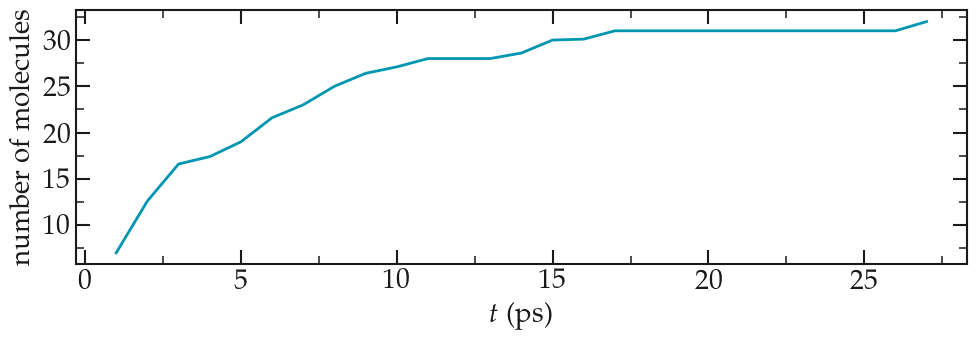

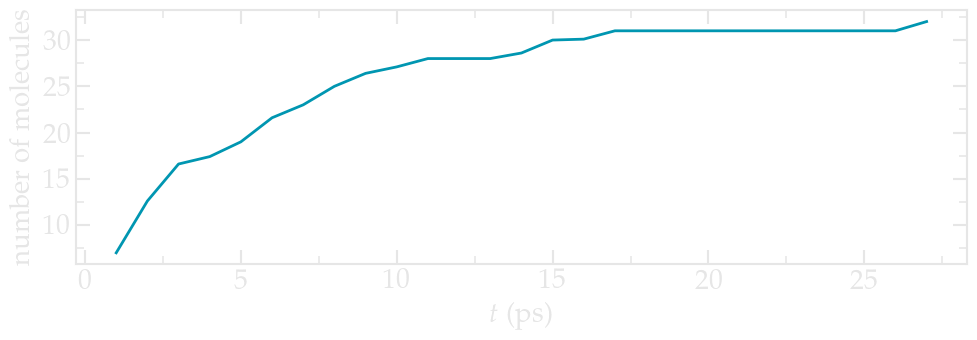

In [17]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):

    fig = plt.figure(figsize=(28, 3.5))
    ax1 = fig.add_subplot(131)
    plt.plot(time/1000, 
            numbermolecule, 
            linewidth = 2, color=myblue)

    divider = make_axes_locatable(ax1)
    ax1.set_ylabel(r'number of molecules', fontdict=font)
    ax1.set_xlabel(r'$t$ (ps)', fontdict=font)

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    #plt.ylim(5, 65)
    ax1.minorticks_on()
    ax1.tick_params('both', length=10, width=1.5, which='major', direction='in')
    ax1.tick_params('both', length=6, width=1.1, which='minor', direction='in')
    ax1.xaxis.set_ticks_position('both')
    ax1.yaxis.set_ticks_position('both')
    ax1.spines["top"].set_linewidth(1.5)
    ax1.spines["bottom"].set_linewidth(1.5)
    ax1.spines["left"].set_linewidth(1.5)
    ax1.spines["right"].set_linewidth(1.5)
    #ax1.set_xticks([0, 50, 100, 150, 200, 250, 300, 350])
    #ax1.set_yticks([0, 2000, 4000, 6000, 8000])
    minor_locator_y = AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator_y)
    minor_locator_x = AutoMinorLocator(2)
    ax1.xaxis.set_minor_locator(minor_locator_x)
    ax1.xaxis.label.set_color(mygray)
    ax1.yaxis.label.set_color(mygray)
    ax1.tick_params(axis='x', colors=mygray)
    ax1.tick_params(axis='y', colors=mygray)
    ax1.spines['left'].set_color(mygray)
    ax1.spines['top'].set_color(mygray)
    ax1.spines['bottom'].set_color(mygray)
    ax1.spines['right'].set_color(mygray)
    ax1.tick_params(axis='y', which='both', colors=mygray)
    ax1.tick_params(axis='x', which='both', colors=mygray)

    fig.tight_layout()
    if mode == 'light':
        plt.savefig('density_evolution-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
        plt.savefig('../../../../../docs/sphinx/source/tutorials/figures/level3/water-adsorption-in-silica/number_evolution-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
    else:
        plt.savefig('density_evolution-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
        plt.savefig('../../../../../docs/sphinx/source/tutorials/figures/level3/water-adsorption-in-silica/number_evolution-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)        
    plt.show()

NameError: name 'lx' is not defined

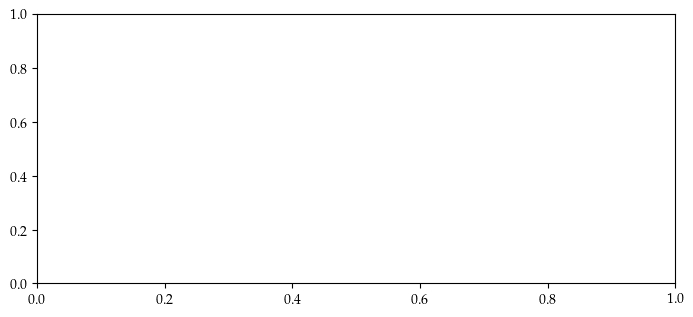

In [18]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):

    fig = plt.figure(figsize=(28, 3.5))
    ax1 = fig.add_subplot(131)
    plt.plot(time/1000, 
            lx, 
            linewidth = 2, color=myblue)
    
    plt.plot(time/1000, 
            ly, 
            linewidth = 2, color=myorange)

    plt.plot(time/1000, 
            lz, 
            linewidth = 2, color=mygray)

    x = np.arange(10, 30)

    plt.plot(x/1000*0 + 50, x, 
             '--', linewidth = 1, color=mygray)

    plt.plot(x/1000*0 + 100, x, 
             '--', linewidth = 1, color=mygray)

    plt.plot(x/1000*0 + 300, x, 
             '--', linewidth = 1, color=mygray)

    divider = make_axes_locatable(ax1)
    ax1.set_ylabel(r'box size (\AA)', fontdict=font)
    ax1.set_xlabel(r'$t$ (ps)', fontdict=font)

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    #plt.ylim(5, 65)
    ax1.minorticks_on()
    ax1.tick_params('both', length=10, width=1.5, which='major', direction='in')
    ax1.tick_params('both', length=6, width=1.1, which='minor', direction='in')
    ax1.xaxis.set_ticks_position('both')
    ax1.yaxis.set_ticks_position('both')
    ax1.spines["top"].set_linewidth(1.5)
    ax1.spines["bottom"].set_linewidth(1.5)
    ax1.spines["left"].set_linewidth(1.5)
    ax1.spines["right"].set_linewidth(1.5)
    ax1.set_xticks([0, 50, 100, 150, 200, 250, 300, 350])
    ax1.set_yticks([10, 15, 20, 25, 30])

    minor_locator_y = AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator_y)
    minor_locator_x = AutoMinorLocator(2)
    ax1.xaxis.set_minor_locator(minor_locator_x)
    ax1.xaxis.label.set_color(mygray)
    ax1.yaxis.label.set_color(mygray)
    ax1.tick_params(axis='x', colors=mygray)
    ax1.tick_params(axis='y', colors=mygray)
    ax1.spines['left'].set_color(mygray)
    ax1.spines['top'].set_color(mygray)
    ax1.spines['bottom'].set_color(mygray)
    ax1.spines['right'].set_color(mygray)
    ax1.tick_params(axis='y', which='both', colors=mygray)
    ax1.tick_params(axis='x', which='both', colors=mygray)

    fig.tight_layout()
    if mode == 'light':
        plt.savefig('density_evolution-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
        plt.savefig('../../../../../docs/sphinx/source/tutorials/figures/level3/water-adsorption-in-silica/dimensions_evolution-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
    else:
        plt.savefig('density_evolution-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
        plt.savefig('../../../../../docs/sphinx/source/tutorials/figures/level3/water-adsorption-in-silica/dimensions_evolution-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)        
    plt.show()